## Red neuronal con Tensorflow

## Carga de librerías

In [342]:
import pandas as pd
import tensorflow as tf
from setuptools import setup, Extension
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping


## Cargar el dataset

In [343]:
# Ruta del archivo
ruta = r'C:/Users/Administrator/Documents/Proyecto seg clientes refuerzo/Proyecto_seg_clientes/Data/teleCust1000t_listo.csv'

# Cargar el dataset
df = pd.read_csv(ruta)

# Ver las primeras filas
print(df.head())
print(df.info())

   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5       0       0   
1       3      11   33        1        7   136.0   5       5       0       0   
2       3      68   52        1       24   116.0   1      29       0       1   
3       2      33   33        0       12    33.0   2       0       0       1   
4       2      23   30        1        9    30.0   1       2       0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 no

## Separar las características (X) y la variable objetivo (y)

In [344]:
# Separar las características (X) y la variable objetivo (y)
X = df.drop('custcat', axis=1)  # Reemplaza 'custcat' por tu variable objetivo
y = df['custcat']

## Dividir el dataset en conjunto de entrenamiento y prueba

In [345]:
# Dividir el dataset en conjunto de entrenamiento, validación y test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


## Escalar las características

In [346]:
# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Codificar la variable objetivo (One-Hot Encoding)

In [347]:
# Codificar la variable objetivo (One-Hot Encoding)
y_train_encoded = to_categorical(y_train - 1)  # Ajustar para que las clases empiecen en 0
y_val_encoded = to_categorical(y_val - 1)
y_test_encoded = to_categorical(y_test - 1)

## Crear la red neuronal

In [348]:
model = Sequential([
    Dense(64, activation='elu', kernel_regularizer=l2(0.01)),
    Dense(32, activation='elu', kernel_regularizer=l2(0.01)),
    Dense(y_train_encoded.shape[1], activation='softmax')
])


## Compilar el modelo

In [349]:
# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Entrenar el modelo

In [350]:
# Definir EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo con EarlyStopping
history = model.fit(
    X_train_scaled, y_train_encoded,
    epochs=200,
    batch_size=8,
    validation_data=(X_val_scaled, y_val_encoded),
    callbacks=[early_stopping],  # Pasamos EarlyStopping aquí
    verbose=1
)

Epoch 1/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2873 - loss: 1.9813 - val_accuracy: 0.3600 - val_loss: 1.8537
Epoch 2/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4108 - loss: 1.7544 - val_accuracy: 0.3600 - val_loss: 1.7644
Epoch 3/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4252 - loss: 1.6889 - val_accuracy: 0.4000 - val_loss: 1.7162
Epoch 4/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4413 - loss: 1.6070 - val_accuracy: 0.3867 - val_loss: 1.6789
Epoch 5/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4249 - loss: 1.5510 - val_accuracy: 0.3867 - val_loss: 1.6270
Epoch 6/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4819 - loss: 1.4977 - val_accuracy: 0.3800 - val_loss: 1.5928
Epoch 7/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4507 - loss: 1.4899 - val_accuracy: 0.4133 - val_loss: 1.5419
Epoch 8/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4877 - loss: 1.4185 - val_accuracy: 0.3933 - v

## Obtener la exactitud de entrenamiento y validación

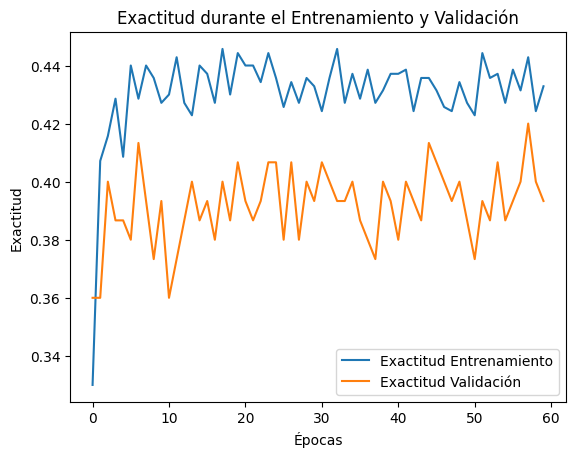

In [351]:
# Obtener la exactitud de entrenamiento y validación
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Graficar la evolución de la exactitud
plt.plot(train_accuracy, label='Exactitud Entrenamiento')
plt.plot(val_accuracy, label='Exactitud Validación')
plt.title('Exactitud durante el Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend()
plt.show()

## Evaluar el modelo

In [352]:
# Evaluar el modelo con el conjunto de validación
y_val_pred_prob = model.predict(X_val_scaled)
y_val_pred = y_val_pred_prob.argmax(axis=1) + 1  # Ajustar para que coincidan con las clases originales

# Ver las últimas puntuaciones de exactitud
print(f"Exactitud final en entrenamiento: {train_accuracy[-1]:.4f}")
print(f"Exactitud final en validación: {val_accuracy[-1]:.4f}")

# Métricas de evaluación en el conjunto de validación
print("\nReporte de clasificación:")
print(classification_report(y_val, y_val_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 
Exactitud final en entrenamiento: 0.4329
Exactitud final en validación: 0.3933

Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.50      0.44      0.47        48
           2       0.25      0.13      0.17        30
           3       0.39      0.50      0.44        38
           4       0.33      0.41      0.36        34

    accuracy                           0.39       150
   macro avg       0.37      0.37      0.36       150
weighted avg       0.38      0.39      0.38       150



In [353]:
# Evaluación del modelo en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)

print(f"Exactitud final en test: {test_accuracy:.4f}")
print(f"Pérdida final en test: {test_loss:.4f}")

# Predecir sobre el conjunto de test
y_test_pred_prob = model.predict(X_test_scaled)
y_test_pred = y_test_pred_prob.argmax(axis=1) + 1  # Ajustar para que coincidan con las clases originales

# Métricas de evaluación en el conjunto de test
from sklearn.metrics import classification_report, confusion_matrix

print("\nReporte de clasificación en test:")
print(classification_report(y_test, y_test_pred))

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nMatriz de confusión en test:")
print(conf_matrix)


Exactitud final en test: 0.4200
Pérdida final en test: 1.2616
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

Reporte de clasificación en test:
              precision    recall  f1-score   support

           1       0.37      0.40      0.38        35
           2       0.42      0.29      0.34        35
           3       0.47      0.56      0.51        45
           4       0.40      0.40      0.40        35

    accuracy                           0.42       150
   macro avg       0.41      0.41      0.41       150
weighted avg       0.42      0.42      0.41       150


Matriz de confusión en test:
[[14  4 11  6]
 [ 4 10 12  9]
 [10  4 25  6]
 [10  6  5 14]]
